# Теория вероятностей и математическая статистика

_Лабораторную работу подготовили: Козак А. В., Подольский К. И._


## Задание № 1

### Основные понятия математической статистики. Вариационный ряд. Эмпирическая   функция распределения.

Пусть $X$ - равномерно распределенная случайная величина на отрезке $[0; \frac{\pi}{4}]$. Тогда получим:


$$\begin{equation}
    \begin{matrix}
    f(x) & =
    & \left\{
    \begin{matrix}
    \frac{4}{\pi}, & \mbox{if } x \in [0;\frac{\pi}{4}] \\
    0, & \mbox{otherwise }
    \end{matrix} \right.
    \end{matrix}
\end{equation}$$

$$\begin{equation}
    \begin{matrix}
    F(x) & =
    & \left\{
    \begin{matrix}
    0, & \mbox{if } x < 0 \\
    \frac{4x}{\pi}, & \mbox{if } x \in [0;\frac{\pi}{4}] \\
    1, & \mbox{if } x > \frac{\pi}{4}
    \end{matrix} \right.
    \end{matrix}
\end{equation}$$

Пусть $Y=\tan(X)$ - также случайная величина. Тогда, зная $f(x)$ и $F(x)$, найдем $f_{y}(y)$ и $F_{y}(y)$. Получаем:

$$\begin{equation}
    \begin{matrix}
    f_{y}(y) & =
    & \left\{
    \begin{matrix}
    \frac{4}{\pi(1+y^2)}, & \mbox{if } y \in [0;1] \\
    0, & \mbox{otherwise }
    \end{matrix} \right.
    \end{matrix}
\end{equation}$$

$$\begin{equation}
    \begin{matrix}
    F_{y}(y) & =
    & \left\{
    \begin{matrix}
    0, & \mbox{if } y < 0 \\
    \frac{4\arctan(y)}{\pi}, & \mbox{if } y \in [0;1] \\
    1, & \mbox{if } y > 1
    \end{matrix} \right.
    \end{matrix}
\end{equation}$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

def gen_rv(n):
    a = 0
    b = math.pi / 4
    uniform_rv = sts.uniform(a, b-a)
    sample_x = uniform_rv.rvs(n)
    sample_y = np.array([math.tan(x) for x in sample_x])
    sample_y.sort()
    return sample_y

def F(y, sample_y):
    func = lambda x: 1 if x < y else 0
    return sum(map(func, sample_y))/float(len(sample_y))

def plot_F(sample_y):
    _y = np.arange(0, 1, 0.0001)
    F_y = []
    for y in _y:
        F_y.append(F(y, sample_y))
    plt.plot(_y, F_y, 'k', label='EF')
    plt.ylabel('$F(y)$')
    plt.xlabel('$y$')
    plt.legend(loc='upper left')

def real_F():
    y = np.arange(0, 1, 0.0001)
    F = np.array([4*math.atan(elem)/math.pi for elem in y])
    plt.plot(y, F, 'r', label='RF')
    plt.ylabel('$F(y)$')
    plt.xlabel('$y$')
    plt.legend(loc='upper left')
    
def hist_y(sample_y, flg=False):
    if len(sample_y) <= 100:
        m = int(math.sqrt(len(sample_y)))
    else:
        m = int(3.22*math.log10(len(sample_y))) + 1
    f, y_i, p = plt.hist(sample_y, normed=True, bins=m)    
    if flg:
        y = [(y_i[1]-y_i[0])/2*(2*i+1)+y_i[0] for i in xrange(len(f))]
        plt.plot(y, f, 'r')
    plt.ylabel('$\hat{f}(y)$')
    plt.xlabel('$y$')

def real_f():
    y = np.arange(0, 1, 0.0001)
    D_y = [4.0/(math.pi*(1 + elem**2)) for elem in y]
    plt.plot(y, D_y, 'r', label='TD')
    plt.legend()
    
def hist_y_eq_m(sample):
    if len(sample) <= 100:
        m = int(math.sqrt(len(sample)))
    else:
        m = int(3.22*math.log10(len(sample))) + 1
    v = len(sample)//m
    h = [sample[(i)*v-1]-sample[(i-1)*v] for i in xrange(1, m+1)]
    y = [sample[(i)*v] for i in xrange(m)] + [sample[-1]]
    P_y = map(lambda x: v/(len(sample)*x), h)
    if len(sample)%m != 0:
        h.append(sample[-1]-sample[v*m])
        P_y.append((len(sample)%m)/len(sample)/h[-1])
    _y = np.arange(0, 1, 0.0001)
    f_y = []
    for y0 in _y:
        for i in xrange(len(y)):
            if y[i] > y0:
                if i == 0:
                    f_y.append(0)
                    break
                else:
                    f_y.append(P_y[i-1])
                    break
            elif i == len(y)-1:
                f_y.append(0)
                break
    plt.fill(_y, f_y, label='HD')
    plt.xlabel('$y$')
    plt.ylabel('$f(y)$')
    plt.legend()
    
def chi2_hip(sample, a):
    if len(sample) <= 100:
        m = int(math.sqrt(len(sample)))
    else:
        m = int(3.22*math.log10(len(sample))) + 1
    v = len(sample) / m
    intervals = [sample[0]] + [(sample[i*v-1]+sample[i*v])/2.0 for i in xrange(1, m)] + [sample[m*v-1]]
    p = [float(v)/len(sample)]*m
    if len(sample)%m != 0:
        p.append(len(sample)%m / float(len(sample)))
        intervals.append(sample[-1])
    F_y = lambda y: 4*math.atan(y)/math.pi
    p_t = [F_y(intervals[i])-F_y(intervals[i-1]) for i in xrange(1, len(intervals))]

    chi2 = len(sample)*sum([(p[i]-p_t[i])**2/p_t[i] for i in xrange(len(p))]) 
    if chi2 <= sts.chi2.ppf(1-a, len(p)-1):
        print('Hypothesis is adopted.')
    else:
        print("Hypothesis isn't adopted.") 
        
def kolm_hip(sample):
    F_y = lambda y: 4*math.atan(y)/math.pi
    D_n = max([abs(float(i)/len(sample)-F_y(sample[i])) for i in xrange(len(sample))]+[abs(F_y(sample[i])-float(i-1)/len(sample)) for i in xrange(1, len(sample))])
    if 1.63 > math.sqrt(len(sample))*D_n:
        print('Hypothesis is adopted.')
    else:
        print("Hypothesis isn't adopted.")

def miz_hip(sample):
    F_y = lambda y: 4*math.atan(y)/math.pi
    D = [(F_y(sample[i])-F(sample[i], sample))**2 for i in xrange(len(sample))]
    if 0.744 > (1.0/(12*len(sample)) + sum(D)):
        print('Hypothesis is adopted.')
    else:
        print("Hypothesis isn't adopted.")

def m_interval(sample, a, flg=False):
    M_n = sum(sample) / float(len(sample))
    if not(flg):
        D_n = sum([(y - M_n)**2 for y in sample]) / float(len(sample)-1)
    else:
        D_n = 0.07852
    u = sts.norm.ppf(1 - a/2.0)
    print (M_n - math.sqrt(float(D_n)/len(sample))*u, M_n + math.sqrt(float(D_n)/len(sample))*u)
    #Studens
    #t = sts.t.ppf(1-a, len(sample)-1)
    #print (M_n - math.sqrt(float(D_n)/len(sample))*t, M_n + math.sqrt(float(D_n)/len(sample))*t)
    
def plot_h_a(sample, flg=False):
    s=''
    if not(flg):
        M_n = sum(sample) / float(len(sample))
        D = sum([(y - M_n)**2 for y in sample]) / float(len(sample)-1)
        s = 'use D_n'
    else:
        D = 0.07852
        s = 'use D'
    a = np.arange(0,1,0.001)
    h = [2*math.sqrt(float(D)/n)*sts.norm.ppf(1 - x/2.0) for x in a]
    plt.plot(a,h, label=s)
    plt.ylabel('$h(a)$')
    plt.xlabel('$a$')
    plt.legend()
      
def plot_h_n(a):
    D = 0.07852
    n = np.arange(2,1000,1)
    h = [2*math.sqrt(float(D)/x)*sts.norm.ppf(1 - a/2.0) for x in n]
    plt.plot(n, h)
    plt.ylabel('$h(n)$')
    plt.xlabel('$n$')
    
def d_interval(sample, a, flg=False):
    n = len(sample) 
    if not(flg):
        X_n = sum(sample) / float(n)
    else:
        X_n = 0.44127
    D_n = sum([(x - X_n)**2 for x in sample]) / float(n-1)
    m_4 = sum([(x - X_n)**4 for x in sample]) / float(n)
    E = m_4 / D_n**2 - 3
    e = math.sqrt((E+2)/n)*sts.norm.ppf(1 - a/2)*D_n
    print (D_n - e, D_n + e)
    #Chi2
    #print (D_n*(n-1)/sts.chi2.ppf(1-a/2, n-1), D_n*(n-1)/sts.chi2.ppf(a/2, n-1))
    
def plot_h_a_d(sample, flg=False):
    s=''
    n = len(sample)
    if not(flg):
        X_n = sum(sample) / float(n)
        s += 'use X_n'
    else:
        X_n = 0.44127
        s += 'use mx'
    D_n = sum([(x - X_n)**2 for x in sample]) / float(n-1)
    m_4 = sum([(x - X_n)**4 for x in sample]) / float(n)
    E = m_4 / D_n**2 - 3
    a = np.arange(0,1,0.001)
    h = [2*math.sqrt((E+2)/n)*sts.norm.ppf(1 - x/2)*D_n for x in a]
    plt.plot(a, h, label=s)
    plt.ylabel('$h(a)$')
    plt.xlabel('$a$')
    plt.legend()
    
def plot_h_n_d(a):
    n = np.arange(10,1000,1)
    X_n = 0.44127
    h = []
    for _n in n:
        sample = gen_rv(_n)
        D_n = sum([(x - X_n)**2 for x in sample]) / float(_n-1)
        m_4 = sum([(x - X_n)**4 for x in sample]) / float(_n)
        E = m_4 / D_n**2 - 3
        e = math.sqrt(abs(E+2)/_n)*sts.norm.ppf(1 - a/2)*D_n
        h.append(2*e)
    plt.plot(n, h)
    plt.ylabel('$h(n)$')
    plt.xlabel('$n$')
    
def chi_norm_d(b1, b2, a):
    n = np.arange(b1,b2,1)
    X_n = 0.44127
    h1, h2, h3, h4 = [], [], [], []
    for _n in n:
        sample = gen_rv(_n)
        D_n = sum([(x - X_n)**2 for x in sample]) / float(_n-1)
        m_4 = sum([(x - X_n)**4 for x in sample]) / float(_n)
        E = m_4 / D_n**2 - 3
        e = math.sqrt(abs(E+2)/_n)*sts.norm.ppf(1 - a/2)*D_n
        h1.append(D_n - e)
        h2.append(D_n + e)
        h3.append(D_n*(_n-1)/sts.chi2.ppf(1-a/2, _n-1))
        h4.append(D_n*(_n-1)/sts.chi2.ppf(a/2, _n-1))
    plt.plot(n, h1, 'r', label='Norm')
    plt.plot(n, h2, 'r')
    plt.plot(n, h3, 'b', label='Chi2')
    plt.plot(n, h4, 'b')
    plt.ylabel('$h(n)$')
    plt.xlabel('$n$')
    plt.legend()
    
def chi_norm_d_h(b1, b2, a):
    n = np.arange(b1,b2,1)
    X_n = 0.44127
    h1, h2 = [], []
    for _n in n:
        sample = gen_rv(_n)
        D_n = sum([(x - X_n)**2 for x in sample]) / float(_n-1)
        m_4 = sum([(x - X_n)**4 for x in sample]) / float(_n)
        E = m_4 / D_n**2 - 3
        e = math.sqrt(abs(E+2)/_n)*sts.norm.ppf(1 - a/2)*D_n
        h1.append(2*e)
        h2.append(D_n*(_n-1)/sts.chi2.ppf(a/2, _n-1) - D_n*(_n-1)/sts.chi2.ppf(1-a/2, _n-1))
    plt.plot(n, h1, 'r', label='Norm')
    plt.plot(n, h2, 'b', label='Chi2')
    plt.ylabel('$h(n)$')
    plt.xlabel('$n$')
    plt.legend()

Теперь сформируем выборку случайной величены $Y$ размера $n$, построим эмпирическую и теоретическую функции распределения.

In [4]:
n = int(raw_input('n = '))
sample_y = gen_rv(n)
frame =  pd.DataFrame(data={'Y': sample_y}, index=range(1, len(sample_y)+1))
frame

n = 10


,Y
1,0.032137
2,0.092848
3,0.102137
4,0.139462
5,0.218987
6,0.319381
7,0.457109
8,0.626103
9,0.700689
10,0.736964


Эмпирическая функция распределения по выборке из $n$ выглядит следующим образом:

$$\begin{equation}
    \begin{matrix}
    \hat{F}_{y}(y) & = & \frac{1}{n}\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}<y\}}
    \end{matrix}
\end{equation}$$

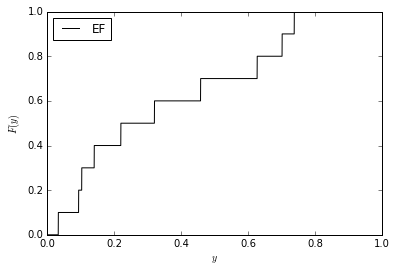

In [5]:
plot_F(sample_y)

Зная аналитическую функцию распределения случайной величины $Y$, построим график $F_{y}(y)$:

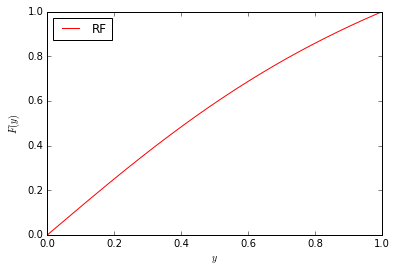

In [6]:
real_F()

Построим эмпирическую и аналитическую функции в одной системе:

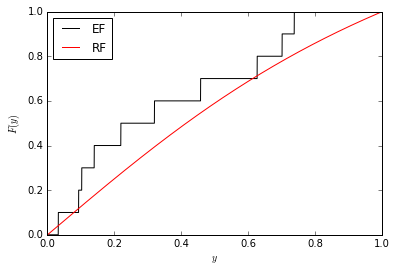

In [7]:
plot_F(sample_y)
real_F()

Давайте посмотрим, как эмпирическая функция зависит от $n$.
Пусть $n=10$, тогда:

In [ ]:
n = 10
d = gen_rv(n)
plot_F(d)
real_F()

Теперь возьмем $n=30$.

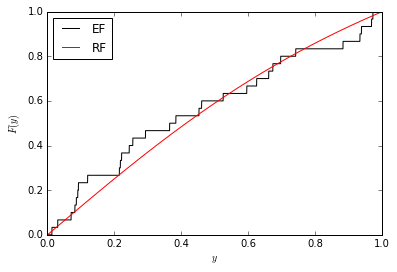

In [8]:
n = 30
d = gen_rv(n)
plot_F(d)
real_F()

$n=50$

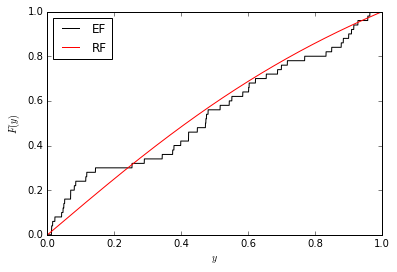

In [9]:
n = 50
d = gen_rv(n)
plot_F(d)
real_F()

$n=100$

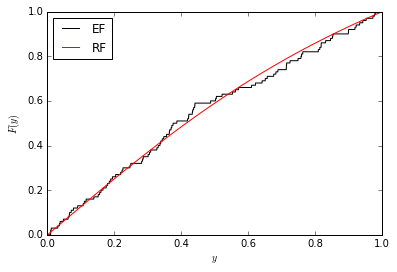

In [10]:
n = 100
d = gen_rv(n)
plot_F(d)
real_F()

$n=1000$

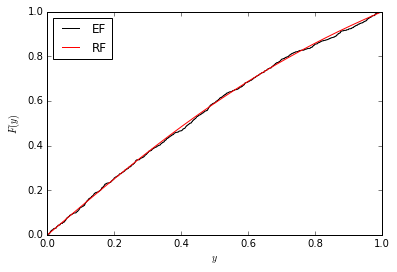

In [11]:
n = 1000
d = gen_rv(n)
plot_F(d)
real_F()

## Вывод:

Заметим, что при $n\to\infty$ $\hat{F}(y)\to F_{y}(y)$. Действительно, мы получили, что на больших выборках частота появления события $Y<y$ практически (с некоторой погрешностью) равна вероятности этого события. Тем самым мы убедились в справедливости теоремы Бернулли.
$$\lim_{n\to\infty} P\left\{\left|\frac{m}{n}-p\right| < \epsilon\right\}=1.$$
А также справедливости теоремы Гливенко относительно эмпирической и теоретической функций распределения.

## Задание № 2

### Статистический ряд. Построение гистограммы равноинтервальным методом.

Для выборки из $n$ случайной величины $Y$ построим гистограмму распределения. 
Пусть мы имеем вариационный ряд $y_{1}\le y_{2}\le\ldots\le y_{n}$, тогда все значения выборки распологаются на отрезке $[y_{1};y_{n}]$. Разобъем этот отрезок на $M$ одинаковых интервалов, где
$$\begin{matrix}
    M & = &
    \left\{
    \begin{matrix}
    [\sqrt{n}], & \mbox{if } n\le 100 \\
    [(2...4)lg(n)], & \mbox{if } n>100
    \end{matrix} \right.
    \end{matrix}$$
Далее для каждого интервала находится число $m_{i}$, которое равно количеству значений из выбоки, принадлежащих интервалу $[y_{i}^{*};y_{i+1}^{*})$. Таким образом получаем: $$\hat{f}(y)=\frac{m_{i}}{n\delta_{M}}$$
Полигоном называют ломаную линию, отрезки которой соединяют точки
с координатами по оси абсцисс, равными серединам интервалов, а по оси ординат – соответствующим частостям. Построим гистограмму и полигон сгенерированной выборки.

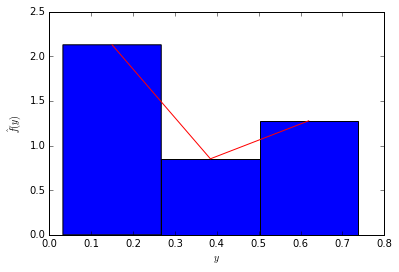

In [12]:
hist_y(sample_y, True)

Построим график аналитической плотности вероятности случайной величины $Y$.
$$\begin{equation}
    \begin{matrix}
    f_{y}(y) & =
    & \left\{
    \begin{matrix}
    \frac{4}{\pi(1+y^2)}, & \mbox{if } y \in [0;1] \\
    0, & \mbox{otherwise }
    \end{matrix} \right.
    \end{matrix}
\end{equation}$$

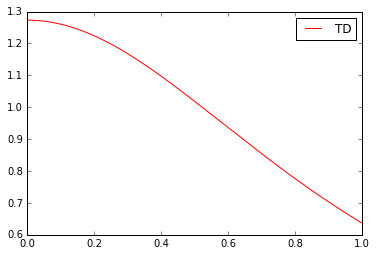

In [13]:
real_f()

Построим гистограмму и аналитическую плотность в одной системе.

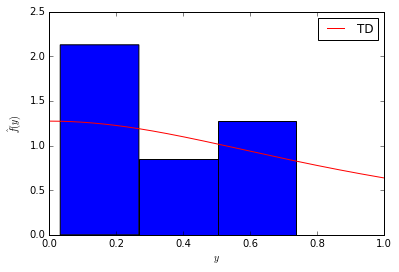

In [14]:
hist_y(sample_y)
real_f()

Теперь сгенерируем две выборки для $n=20$ и $n=1000000$ и сравним результаты.

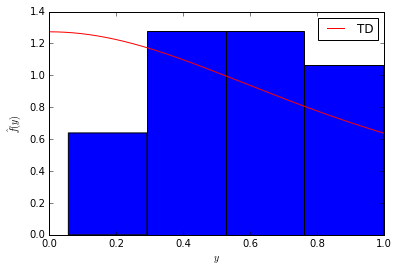

In [15]:
sample = gen_rv(20)
hist_y(sample)
real_f()

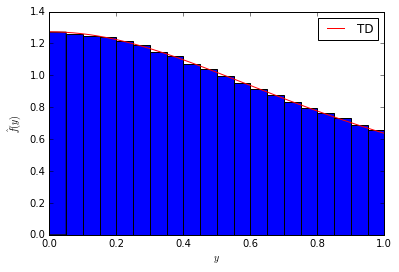

In [16]:
sample = gen_rv(1000000)
hist_y(sample)
real_f()

## Вывод:

Не трудно понять, что при $n\to\infty$,  $\hat{f}(y)\to f_{y}(y)$. Тем самым мы опять получили подтверждение справедливости теоремы Бернулли.

## Задание № 3

### Статистический ряд. Построение гистограммы равновероятностным   методом.

Построим гистограмму исходной выборки равновероятносным методом.

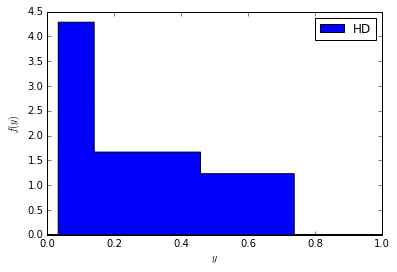

In [17]:
hist_y_eq_m(sample_y)

Построим гистограмму и аналитическую плотность в одной системе.

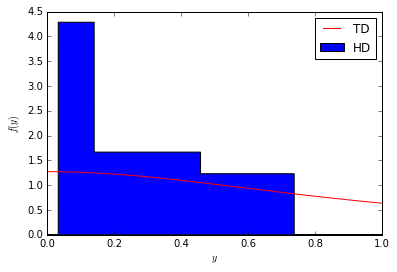

In [18]:
hist_y_eq_m(sample_y)
real_f()

Проанализируем изменение гистограммы плотности при различных $n$. Пусть $n=50$ и $n=10000$.

При $n=50$ получаем:

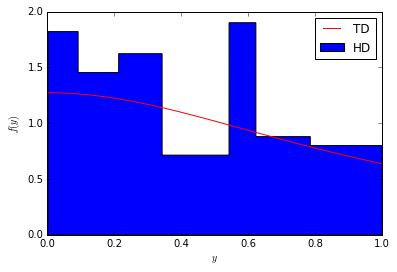

In [19]:
sample = gen_rv(50)
hist_y_eq_m(sample)
real_f()

При $n=10000$:

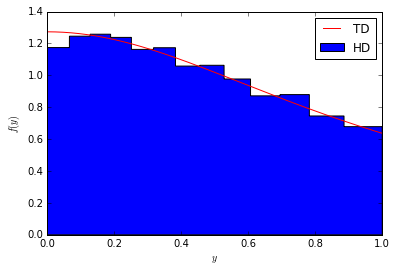

In [20]:
sample = gen_rv(10000)
hist_y_eq_m(sample)
real_f()

## Вывод:

На больших выборках, равновероятностный метод достаточно хорошо сходится к аналитической плотности вероятности случайной величины. 

## Задание № 4

### Проверка статистических гипотез о виде закона распределения.

### 1. Критерий Пирсона.

Пусть необходимо проверить следующую гипотезу:
$$H_{0}: F(y) = \hat{F}(y)$$
Тогда альтернативная гиротеза имеет вид:
$$H_{1}: F(y) \ne \hat{F}(y)$$
Для нахождения общей степени расхождения между $F(y)$ и $\hat{F}(y)$ необходимо подсчитать следующее выражение:
$$\chi^2 = n\sum_{i=1}^{M}\frac{(\hat{p}_{i}-p_{i})^2}{p_{i}},$$
где $p_{i}$ и $\hat{p}_{i}$ - теоретическая и эмпирическая вероятности попадания в $i$-ый интервал.

Величина $\chi^2$ при неограниченном увеличении $n$ имеет $\chi^2$-распределение с $M-S-1$ степенями свободы. ($S$-количество параметров теоритического распределения, значения которых были получены их экспериментальных данных) 

#### Замечание:
1. Должно выполняться следующие неравенство: $$\left|1-\sum_{i=1}^{M}p_{i}\right|\le 0.01$$
2. Если $\chi^2_{\alpha , k} \ge \chi^2$, то гипотеза $H_{0}$ принимается, в противном случае отклоняется. 

In [21]:
sample_y = gen_rv(200)

Проверим гипотезу $H_{0}$ с заданным уровнем значимости $\alpha = 0.01$.

Hypothesis is adopted.


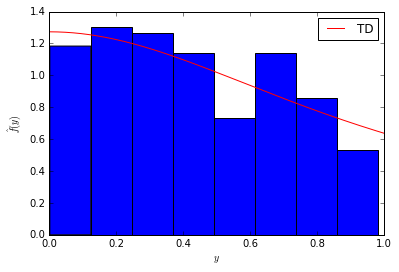

In [22]:
hist_y(sample_y)
real_f()
chi2_hip(sample_y, 0.01)

### 2. Критерий Колмогорова.

Пусть необходимо проверить следующую гипотезу:
$$H_{0}: F(y) = \hat{F}(y)$$
Тогда альтернативная гиротеза имеет вид:
$$H_{1}: F(y) \ne \hat{F}(y)$$
В качестве меры расхождения теоретической и эмпирической функций распределения Колмогоров использовал значение $D_{n}$:
$$D_{n} = sup_{y}\left|\hat{F}(y)-F(y)\right|$$
Колмогоров доказал, что:
$$\sqrt{n}D_{n}\to K \mbox{ по распределению при } n\to \infty$$

И так имеем:
$$P(\sqrt{n}D_{n}>\lambda_{\gamma})=\alpha=1-K(\lambda_{\gamma})$$
Следовательно, если для задонного уровня значимости $\alpha$ найденое $\lambda_{\gamma}$ меньше $\sqrt{n}D_{n}$, то гипотеза $H_{0}$ отклоняется.

Hypothesis is adopted.


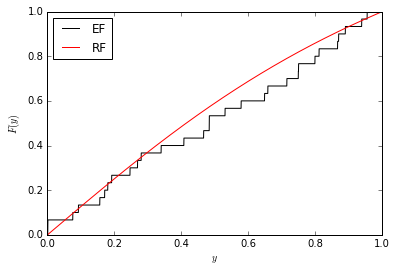

In [23]:
sample = gen_rv(30)
plot_F(sample)
real_F()
kolm_hip(sample)

### 3. Критерий Мизеса.

Пусть необходимо проверить следующую гипотезу:
$$H_{0}: F(y) = \hat{F}(y)$$
Тогда альтернативная гиротеза имеет вид:
$$H_{1}: F(y) \ne \hat{F}(y)$$

В качестве меры различия теоретической и эмпирической функций распределения выступает статистика:
$$n\omega^2_{n}=\frac{1}{12n} + \sum^{n}_{i=1}\left(F(y_{i})-\hat{F}(y_{i})\right)^2$$
Критическое значение статистики при уровне значимости $\alpha = 0.01$ равно $0.744$. Если оно больше полученного значения статистики, то гипотеза $H_{0}$ принимается.

Hypothesis is adopted.


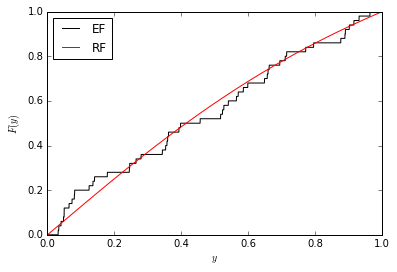

In [24]:
sample = gen_rv(50)
plot_F(sample)
real_F()
miz_hip(sample)

---

## Дополнительное задание.

### Центральная предельная теорема.

**Классическа ЦПТ**:
>Пусть $X_{1},X_{2},\dots,X_{n}$ - _независимые одинаково распределенные_ случайные величины, имеющие конечные математическое ожидание ($m_{x}$) и дисперсию ($\sigma_{x}^2$). Пусть $$S_{n} = \sum_{i=1}^{n}X_{i}.$$ Тогда $$\frac{S_{n}-m_{x}n}{\sigma \sqrt{n}} \to N(0, 1) \mbox{ по распределению при } n\to \infty.$$

Пусть $\hat{X}_{n}$ - выборочное средние случайных велечин $X_{1},X_{2},\dots,X_{n}$, т.е. $$\hat{X}_{n}=\frac{1}{n}\sum_{i=1}^{n}X_{i}.$$ Не трудно понять, что из ЦПТ следует: 
$$\sqrt{n}\frac{\hat{X}_{n}-m_{x}}{\sigma} \to N(0, 1) \mbox{ по распределению при } n\to \infty.$$ Последнее эквивалентно следующему:
$$\hat{X}_{n} \to N\left(m_{x},\frac{\sigma}{\sqrt{n}}\right)$$

Проверим выполнение ЦПТ программно.

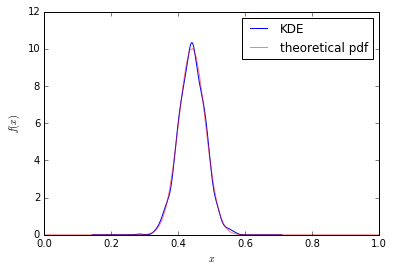

In [25]:
n = 50
X_n = [sum(gen_rv(n))/float(n) for i in xrange(1000)]
df = pd.DataFrame(X_n, columns=['KDE'])
ax = df.plot(kind='density')
x = np.linspace(0,1,100)
norm_rv = sts.norm(0.44127, 0.28021/math.sqrt(n))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf,'r', label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Вывод:

Таким образом, мы получили практическое подтверждение справедливости ЦПТ.

---

## Задание № 5

### Интервальные оценки.

Пусть $\theta$ - неизвестный параметр генеральной совокупности. По заданной выборке по определенным правилам находятся числа $\theta_{1}$ и $\theta_{2}$, такие чтобы выполнялось равенство: $$P(\theta_{1}<\theta<\theta_{2})=1-\alpha.$$
Интервал $(\theta_{1};\theta_{2})$ называется доверительным для параметра $\theta$, а число $1-\alpha$ - доверительной вероятностью или надежностью сделанной оценки.

### 1. Доверительный интервал для математического ожидания СВ.

Пусть мы имеем выборку $X^{n}=(x_{1},\dots,x_{n})$ случайной велечины $X$, математическое ожидание и дисперсия которой неизвестны. Определим выборочное среднее и несмещенную дисперсию: $$\hat{X}_{n}=\frac{1}{n}\sum^{n}_{i=1}x_{i}$$
$$\hat{D}_{n}=\frac{1}{n-1}\sum^{n}_{i=1}(x_{i}-\hat{X}_{n})^2.$$

Согласно ЦПТ, при $n\to\infty$ $\hat{X}_{n} \to N\left(m_{x},\frac{\sigma}{\sqrt{n}}\right)$. Таки образом, будем считать, что величина $\hat{X}_{n}$ распределена нормально.

Рассмотрим вероятность $P\left(\left|\hat{X}_{n}-m_{x}\right|<\epsilon\right)=1-\alpha$. Учитывая, что $\sqrt{n}\frac{\hat{X}_{n}-m_{x}}{\sigma}$ - нормированное нормальное распределение, перепишим вероятность, тогда получим: $$P\left( \frac{ \left|\hat{X}_{n}-m_{x}\right| }{\sqrt{\frac{\hat{D}_{n}}{n}}}< \frac{\epsilon}{\sqrt{\frac{\hat{D}_{n}}{n}}}\right)=1-\alpha.$$
Далее получим: $$2\Phi\left(\frac{\epsilon}{\sqrt{\frac{\hat{D}_{n}}{n}}}\right)=1-\alpha$$
$$\frac{\epsilon}{\sqrt{\frac{\hat{D}_{n}}{n}}} = \Phi^{-1}\left(\frac{1-\alpha}{2}\right)=\chi_{1-\alpha/2}$$
Таким образом, с вероятностью $1-\alpha$ можно утверждать, что $m_{x}\in\left( \hat{X}_{n}-\sqrt{\frac{\hat{D}_{n}}{n}}\chi_{1-\alpha/2} ; \hat{X}_{n}+\sqrt{\frac{\hat{D}_{n}}{n}}\chi_{1-\alpha/2} \right).$

Для нашей случайной велечины $Y$ теоретическое матожидание $m_{y}=0.44127$ и теоретическую дисперсию $D_{y}=0.07852.$


Пусть $n=20.$

M for a = 0.5 with unknowable D is
(0.40086247627390409, 0.48837819154223111)
M for a = 0.5 with knowable D is
(0.40235828950451985, 0.48688237831161535)
------------------------------------------
M for a = 0.1 with unknowable D is
(0.33790963768732296, 0.55133103012881224)
M for a = 0.1 with knowable D is
(0.3415574230197243, 0.54768324479641084)
------------------------------------------
M for a = 0.01 with unknowable D is
(0.27751212815426263, 0.61172853966187257)
M for a = 0.01 with knowable D is
(0.28322453453395352, 0.60601613328218162)
------------------------------------------
M for a = 0.001 with unknowable D is
(0.23114577745087223, 0.65809489036526303)
M for a = 0.001 with knowable D is
(0.23844316546785771, 0.65079750234827749)
------------------------------------------


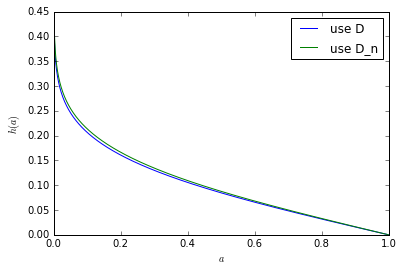

In [26]:
n = 20
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'M for a = {} with unknowable D is'.format(_a)
    m_interval(sample, _a)
    print 'M for a = {} with knowable D is'.format(_a)
    m_interval(sample, _a, True)
    print '------------------------------------------'

plot_h_a(sample, True)
plot_h_a(sample)

Пусть $n=30.$

M for a = 0.5 with unknowable D is
(0.33559064274610678, 0.40363231173269581)
M for a = 0.5 with knowable D is
(0.33510466248088883, 0.40411829199791377)
------------------------------------------
M for a = 0.1 with unknowable D is
(0.28664610527942225, 0.45257684919938035)
M for a = 0.1 with knowable D is
(0.28546096287861011, 0.45376199160019248)
------------------------------------------
M for a = 0.01 with unknowable D is
(0.23968828360519157, 0.49953467087361103)
M for a = 0.01 with knowable D is
(0.23783235887433993, 0.50139059560446264)
------------------------------------------
M for a = 0.001 with unknowable D is
(0.20363939939047307, 0.53558355508832955)
M for a = 0.001 with knowable D is
(0.20126852414261004, 0.5379544303361925)
------------------------------------------


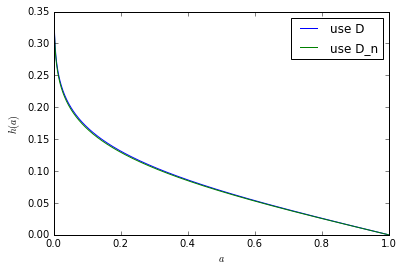

In [27]:
n = 30
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'M for a = {} with unknowable D is'.format(_a)
    m_interval(sample, _a)
    print 'M for a = {} with knowable D is'.format(_a)
    m_interval(sample, _a, True)
    print '------------------------------------------'

plot_h_a(sample, True)
plot_h_a(sample)

Пусть $n=50.$

M for a = 0.5 with unknowable D is
(0.46058037511659677, 0.51347610303927027)
M for a = 0.5 with knowable D is
(0.46029937529985687, 0.51375710285601017)
------------------------------------------
M for a = 0.1 with unknowable D is
(0.42253079497403562, 0.55152568318183137)
M for a = 0.1 with knowable D is
(0.42184553093910704, 0.55221094721676001)
------------------------------------------
M for a = 0.01 with unknowable D is
(0.38602569161434153, 0.58803078654152552)
M for a = 0.01 with knowable D is
(0.38495257291677776, 0.58910390523908929)
------------------------------------------
M for a = 0.001 with unknowable D is
(0.35800121779207916, 0.61605526036378788)
M for a = 0.001 with knowable D is
(0.35663034831888374, 0.61742612983698331)
------------------------------------------


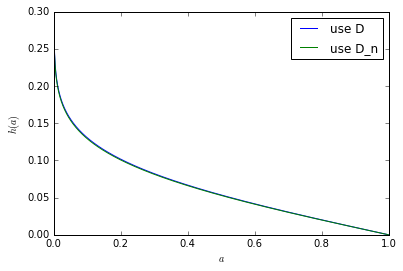

In [28]:
n = 50
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'M for a = {} with unknowable D is'.format(_a)
    m_interval(sample, _a)
    print 'M for a = {} with knowable D is'.format(_a)
    m_interval(sample, _a, True)
    print '------------------------------------------'

plot_h_a(sample, True)
plot_h_a(sample)

Пусть $n=70.$

In [ ]:
n = 70
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'M for a = {} with unknowable D is'.format(_a)
    m_interval(sample, _a)
    print 'M for a = {} with knowable D is'.format(_a)
    m_interval(sample, _a, True)
    print '------------------------------------------'

plot_h_a(sample, True)
plot_h_a(sample)

Пусть $n=100.$

In [ ]:
n = 100
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'M for a = {} with unknowable D is'.format(_a)
    m_interval(sample, _a)
    print 'M for a = {} with knowable D is'.format(_a)
    m_interval(sample, _a, True)
    print '------------------------------------------'

plot_h_a(sample, True)
plot_h_a(sample)

Пусть $n=150.$

M for a = 0.5 with unknowable D is
(0.44591847182704925, 0.47596152767783628)
M for a = 0.5 with knowable D is
(0.44550808305503736, 0.47637191644984817)
------------------------------------------
M for a = 0.1 with unknowable D is
(0.42430754583708913, 0.4975724536677964)
M for a = 0.1 with knowable D is
(0.42330674566198245, 0.49857325384290307)
------------------------------------------
M for a = 0.01 with unknowable D is
(0.40357383250815437, 0.51830616699673115)
M for a = 0.01 with knowable D is
(0.40200658641658915, 0.51987341308829638)
------------------------------------------
M for a = 0.001 with unknowable D is
(0.38765684137681095, 0.53422315812807453)
M for a = 0.001 with knowable D is
(0.385654742420946, 0.53622525708393953)
------------------------------------------


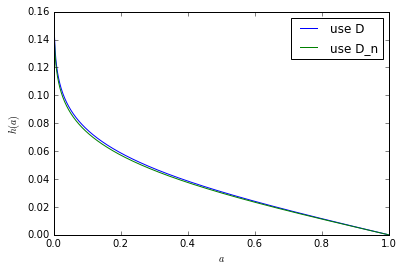

In [29]:
n = 150
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'M for a = {} with unknowable D is'.format(_a)
    m_interval(sample, _a)
    print 'M for a = {} with knowable D is'.format(_a)
    m_interval(sample, _a, True)
    print '------------------------------------------'

plot_h_a(sample, True)
plot_h_a(sample)

Построим график зависимости длинны доверительного интервала от объема выборки. 

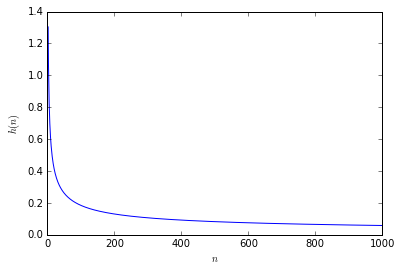

In [30]:
plot_h_n(0.001)

### Вывод:

Мы убедились, что с помощью ЦПТ можно достаточно хорошо оценить реальное матожидание случайной величины. Осталось заметить, что при фиксированном объеме выборки: чем больше доверительная вероятность, тем шире доверительный интервал. И чем больше объем выборки, тем меньше доверительный интервал, т.е для увеличения точности на порядок, необходимо выборку увеличить на два порядка.

### 2. Доверительный интервал для дисперсии СВ.

Пусть мы имеем выборочную исправленную дисперсию: $$\hat{D}_{n}=\frac{1}{n-1}\sum^{n}_{i=1}(x_{i}-\hat{X}_{n})^2.$$
Тогда воспользуемся следующим фактом: $$\frac{(n-1)\hat{D}_{n}}{\sigma^2} \sim \chi^{2}_{n-1}.\mbox{   }(*)$$
Тем самым получаем оценку:
$$\sigma^2\in \left( \frac{(n-1)\hat{D}_{n}}{\chi^2_{1-\alpha/2;n-1}}; \frac{(n-1)\hat{D}_{n}}{\chi^2_{\alpha/2;n-1}} \right).$$

Однако $(*)$ есть результат теоремы Фишера для нормально распределенных СВ $X_{i}$. Для произвольного распределения воспользуемся тем фактом, что начальные и центральные моменты являются асимптотически нормальными, т.е. для $\hat{D}_{n}$ имеем:
$$\frac{\left(\hat{D}_{n} - \sigma^2\right)}{\sqrt{D\left[\hat{D}_{n}\right]}}\to N\left(0;1\right) \mbox{ по распределению при }n\to\infty.$$
Таким образом получаем оценку:
$$\sigma^2\in \left( \hat{D}_{n} - \sqrt{D\left[\hat{D}_{n}\right]}\chi_{1-\alpha/2}; \hat{D}_{n} + \sqrt{D\left[\hat{D}_{n}\right]}\chi_{1-\alpha/2} \right),$$
где $D\left[\hat{D}_{n}\right] = \frac{\mu_{4}-\mu_{2}^{2}}{n} = \frac{(E_{Y}-2)\sigma^4}{n}$ _(здесь неизветные характеристики можно заменить выборочными характеристиками)_.


Пусть $n=20$.

D for a = 0.5 with unknowable mx is
(0.085785535928773096, 0.11080549163729338)
D for a = 0.5 with knowable mx is
(0.090040663598088808, 0.11061950436699948)
------------------------------------------
D for a = 0.1 with unknowable mx is
(0.067787885697238912, 0.12880314186882758)
D for a = 0.1 with knowable mx is
(0.075237648650977415, 0.12542251931411086)
------------------------------------------
D for a = 0.01 with unknowable mx is
(0.050520781054502813, 0.14607024651156367)
D for a = 0.01 with knowable mx is
(0.061035505324961131, 0.13962466264012716)
------------------------------------------
D for a = 0.001 with unknowable mx is
(0.037265058497614849, 0.15932596906845162)
D for a = 0.001 with knowable mx is
(0.050132712092511085, 0.15052745587257721)
------------------------------------------


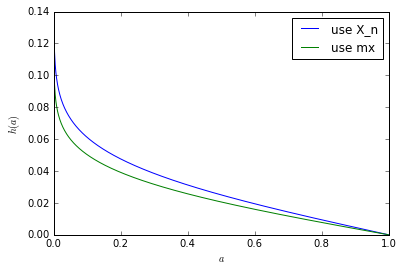

In [31]:
n = 20
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'D for a = {} with unknowable mx is'.format(_a)
    d_interval(sample, _a)
    print 'D for a = {} with knowable mx is'.format(_a)
    d_interval(sample, _a, True)
    print '------------------------------------------'
    
plot_h_a_d(sample)
plot_h_a_d(sample, True)

Пусть $n=30$.

D for a = 0.5 with unknowable mx is
(0.07926886660215296, 0.10793443764506463)
D for a = 0.5 with knowable mx is
(0.098489748189515766, 0.11845437309310079)
------------------------------------------
D for a = 0.1 with unknowable mx is
(0.058648809263608957, 0.12855449498360863)
D for a = 0.1 with knowable mx is
(0.08412855825758718, 0.13281556302502939)
------------------------------------------
D for a = 0.01 with unknowable mx is
(0.03886574407324235, 0.14833756017397526)
D for a = 0.01 with knowable mx is
(0.070350305754694725, 0.14659381552792183)
------------------------------------------
D for a = 0.001 with unknowable mx is
(0.02367855265266762, 0.16352475159454999)
D for a = 0.001 with knowable mx is
(0.059772927770602724, 0.15717119351201383)
------------------------------------------


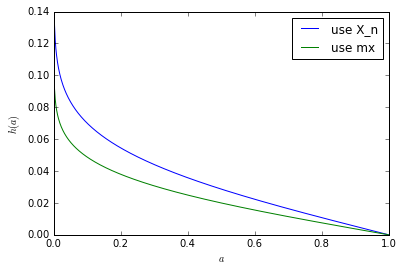

In [32]:
n = 30
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'D for a = {} with unknowable mx is'.format(_a)
    d_interval(sample, _a)
    print 'D for a = {} with knowable mx is'.format(_a)
    d_interval(sample, _a, True)
    print '------------------------------------------'
    
plot_h_a_d(sample)
plot_h_a_d(sample, True)

Пусть $n=50$.

In [ ]:
n = 50
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'D for a = {} with unknowable mx is'.format(_a)
    d_interval(sample, _a)
    print 'D for a = {} with knowable mx is'.format(_a)
    d_interval(sample, _a, True)
    print '------------------------------------------'
    
plot_h_a_d(sample)
plot_h_a_d(sample, True)

Пусть $n=70$.

In [ ]:
n = 70
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'D for a = {} with unknowable mx is'.format(_a)
    d_interval(sample, _a)
    print 'D for a = {} with knowable mx is'.format(_a)
    d_interval(sample, _a, True)
    print '------------------------------------------'
    
plot_h_a_d(sample)
plot_h_a_d(sample, True)

Пусть $n=100$.

D for a = 0.5 with unknowable mx is
(0.071898727919202668, 0.081747436479794586)
D for a = 0.5 with knowable mx is
(0.071972790149661237, 0.081737282390973276)
------------------------------------------
D for a = 0.1 with unknowable mx is
(0.064814238483216643, 0.08883192591578061)
D for a = 0.1 with knowable mx is
(0.064948880191746411, 0.088761192348888102)
------------------------------------------
D for a = 0.01 with unknowable mx is
(0.058017316726331189, 0.095628847672666065)
D for a = 0.01 with knowable mx is
(0.058210078921346747, 0.095499993619287765)
------------------------------------------
D for a = 0.001 with unknowable mx is
(0.052799411876947464, 0.10084675252204979)
D for a = 0.001 with knowable mx is
(0.053036792382888186, 0.10067328015774632)
------------------------------------------


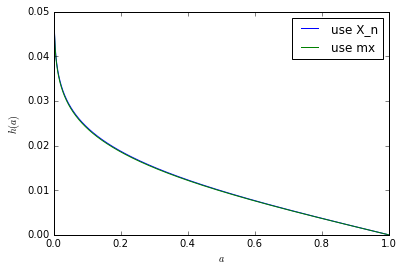

In [33]:
n = 100
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'D for a = {} with unknowable mx is'.format(_a)
    d_interval(sample, _a)
    print 'D for a = {} with knowable mx is'.format(_a)
    d_interval(sample, _a, True)
    print '------------------------------------------'
    
plot_h_a_d(sample)
plot_h_a_d(sample, True)

Пусть $n=150$.

In [ ]:
n = 150
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_rv(n)
for _a in a:
    print 'D for a = {} with unknowable mx is'.format(_a)
    d_interval(sample, _a)
    print 'D for a = {} with knowable mx is'.format(_a)
    d_interval(sample, _a, True)
    print '------------------------------------------'
    
plot_h_a_d(sample)
plot_h_a_d(sample, True)

Построим график зависимости длины доверительного интервала от объема выборки.

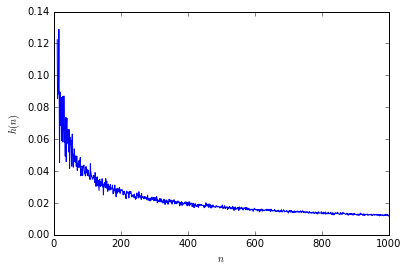

In [34]:
plot_h_n_d(0.01)

Давайте теперь в качестве дополнительного задания исследуем отличие диапазона доверительного интревала от способа его нахождения. (зафиксируем $\alpha = 0.01$)

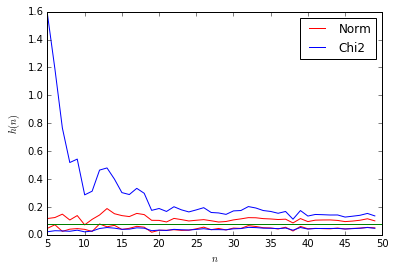

In [35]:
chi_norm_d(5, 50, 0.01)
plt.plot([5,50], [0.07852, 0.07852], 'g')

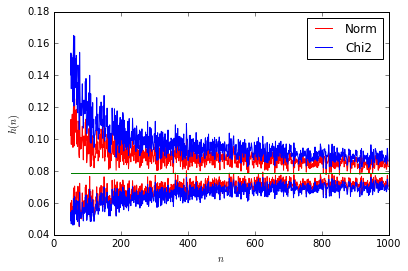

In [36]:
chi_norm_d(50, 1000, 0.01)
plt.plot([50,1000], [0.07852, 0.07852], 'g')

Просмотрим эту зависимость но на графике изобразим не диапазон, а ширину интервала.

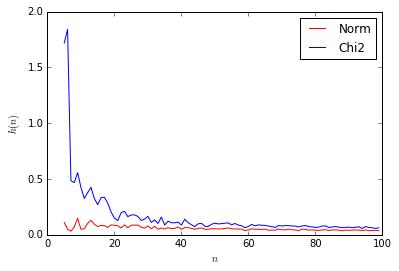

In [37]:
chi_norm_d_h(5, 100, 0.01)

In [ ]:
chi_norm_d_h(100, 1000, 0.01)

### Вывод:

В ходе работы мы выяснили, что при большей доверительной вероятности - шире доверительный интервал для дисперсии.
Также: чем больше объем выборки, тем **у**же доверительный интервал.

В работе мы также проанализировали два способа нахождения дов. интервала: с помощью хи-квадрат и нормального распределений случайной велечины. Мы увидили, что при небольших объёмах выборки лучшую оценку дает нормальное распределение. Что касается больших выборок, то тут нормальное также дает отличный результат, но хи-квадрат неплохо стремилься к нему. Это все связано с тем, что теорема Фишера применима **только** для нормально распределенных величин, а на больших выборках хи-квадрат сходится к нормальному по распределению, тем самым на больших выборках мы получаем практически идентичную оценку дисперсии двумя разными способами.